# GiziWise

The project aims to develop a mobile app for tracking the nutritional content of food. The app will use the latest nutritional data, consider regional variations, and focus on simplicity, accuracy, and ease of use. In the end, the app aims to empower users to make informed decisions, improve their health, and reduce healthcare costs.

# 1. Loading and preprocessing<a class="anchor" id="1"></a><a class="anchor" id="1"></a>

In [21]:
import numpy as np        # Import the NumPy library for numerical operations
import pandas as pd       # Import the Pandas library for data manipulation and analysis
from pathlib import Path  # Import the Path class from the pathlib module for working with file paths
import os                 # Import the os module for operating system-related functionalities
import os.path            # Import the os.path module for working with file paths
import matplotlib.pyplot as plt  # Import the pyplot module from Matplotlib for data visualization
import tensorflow as tf   # Import the TensorFlow library for deep learning and machine learning tasks

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
paths = []   # List to store the file paths of the images
labels = []  # List to store the corresponding labels

# Iterate through the directory and its subdirectories
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Foods_Capstone'):
    for filename in filenames:
        if filename[-4:]=='.jpg' or '.png' or '.jpeg' or '.JPG':
            # If the file has a valid image extension, add its path to the 'paths' list
            paths+=[os.path.join(dirname, filename)]
            # Extract the label from the directory name and add it to the 'labels' list
            labels+=[dirname.split('/')[-1]]

# Print the file paths of the first three images
print(paths[0:3])

['/content/drive/MyDrive/Foods_Capstone/train/rendang/rendang (22).jpg', '/content/drive/MyDrive/Foods_Capstone/train/rendang/rendang (375).jpg', '/content/drive/MyDrive/Foods_Capstone/train/rendang/rendang (416).jpg']


In [23]:
# Import the shuffle function from the sklearn.utils module for shuffling data
from sklearn.utils import shuffle
# Create an empty DataFrame with columns 'filepath' and 'label'
data_df=pd.DataFrame(columns=['filepath','label'])
# Assign the 'paths' list to the 'filepath' column of the DataFrame  
data_df['filepath']=paths
# Extract the label from the filepath and assign it to the 'label' column using lambda function
data_df['label']=data_df['filepath'].apply(lambda x:x.split('/')[-2].replace('  ',' '))
# Extract the train/valid/test category from the filepath and assign it to the 'train/valid/test' column using lambda function
data_df['train/valid/test']=data_df['filepath'].apply(lambda x:x.split('/')[-3])

# Replacing the Class Label to Code Label
Class = ['nasi goreng', 'nasi kuning', 'nasi padang', 'pizza', 'roti bakar',
         'martabak manis', 'kentang goreng', 'tahu', 'tempe', 'capcay',
         'gado gado', 'es buah', 'burger', 'rendang', 'soto ayam',
         'sate', 'martabak telur', 'bakso', 'ayam bakar', 'pempek']
Code = ['AP115', 'AP116', 'AP117', 'AP118', 'AP119',
        'AP120', 'BP077', 'CP062', 'CP083', 'DP030',
        'DP031', 'EP016', 'FP036', 'FP062', 'FP089',
        'FP090', 'FP091', 'FP092', 'FP093', 'GP083']
for i in range(len(Class)):
    data_df = data_df.replace(Class[i], Code[i])

In [24]:
# Shuffle the rows of the DataFrame randomly 
data_df = shuffle(data_df) 
# Display the DataFrame 
display(data_df)

,filepath,label,train/valid/test
3282,/content/drive/MyDrive/Foods_Capstone/train/na...,AP117,train
1814,/content/drive/MyDrive/Foods_Capstone/train/bu...,FP036,train
5993,/content/drive/MyDrive/Foods_Capstone/train/ga...,DP031,train
6508,/content/drive/MyDrive/Foods_Capstone/validati...,DP031,validation
786,/content/drive/MyDrive/Foods_Capstone/train/pi...,AP118,train
...,...,...,...
2587,/content/drive/MyDrive/Foods_Capstone/train/te...,CP083,train
1226,/content/drive/MyDrive/Foods_Capstone/train/na...,AP115,train
5995,/content/drive/MyDrive/Foods_Capstone/train/ga...,DP031,train
4241,/content/drive/MyDrive/Foods_Capstone/train/na...,AP116,train


In [25]:
train_df=data_df[data_df['train/valid/test']=='train']
valid_df=data_df[data_df['train/valid/test']=='validation']
test_df=data_df[data_df['train/valid/test']=='test']

In [26]:
# Print information about the training set
print('-- Training set --\n')

# Print the number of pictures in the training set
print(f'Number of pictures: {train_df.shape[0]}\n')

# Print the number of different labels in the training set
print(f'Number of different labels: {len(train_df.label.unique())}\n')

# Print the unique labels in the training set
print(f'Labels: {train_df.label.unique()}')

-- Training set --

Number of pictures: 6000

Number of different labels: 20

Labels: ['AP117' 'FP036' 'DP031' 'AP118' 'AP119' 'AP115' 'EP016' 'AP116' 'FP090'
 'FP089' 'FP062' 'BP077' 'CP062' 'AP120' 'FP091' 'GP083' 'FP093' 'DP030'
 'CP083' 'FP092']


In [27]:
# Display the first 5 rows of the training DataFrame
train_df.head(5)

,filepath,label,train/valid/test
3282,/content/drive/MyDrive/Foods_Capstone/train/na...,AP117,train
1814,/content/drive/MyDrive/Foods_Capstone/train/bu...,FP036,train
5993,/content/drive/MyDrive/Foods_Capstone/train/ga...,DP031,train
786,/content/drive/MyDrive/Foods_Capstone/train/pi...,AP118,train
3042,/content/drive/MyDrive/Foods_Capstone/train/na...,AP117,train


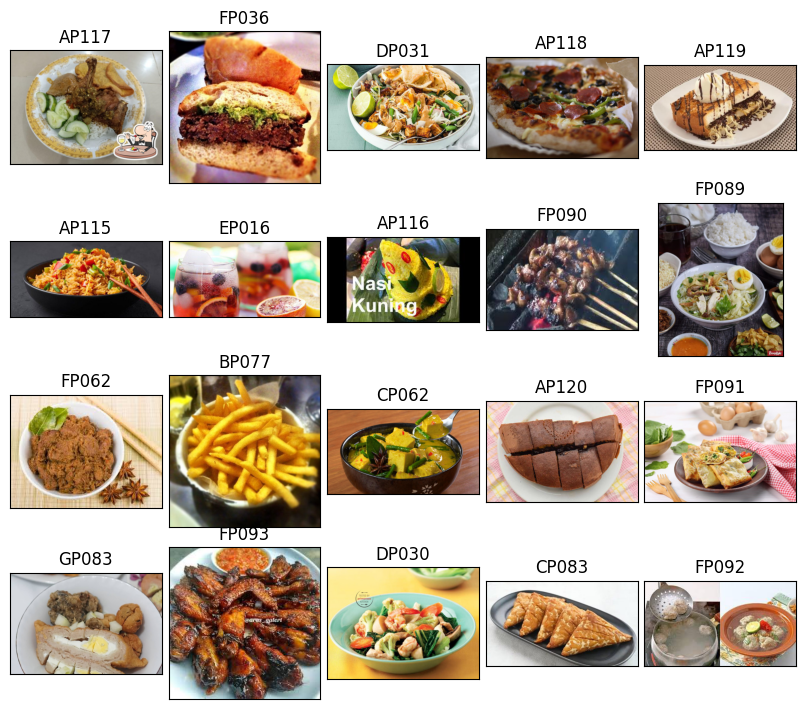

In [28]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.filepath[i]))
    ax.set_title(df_unique.label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

# 2. Load the Images with a generator and Data Augmentation<a class="anchor" id="2"></a>

In [29]:
# Configure image data generators for training, validation, and testing

# Image data generator for training set
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input
)

# Image data generator for test set
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input
)

# Additional augmentation parameters
brightness_range = (0.8, 1.2)
contrast_range = (0.8, 1.2)
channel_shift_range = 20

# Generate training images in batches from the training DataFrame
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    brightness_range=brightness_range,
    contrast_range=contrast_range,
    channel_shift_range=channel_shift_range
)

# Generate validation images in batches from the validation DataFrame
val_images = train_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    brightness_range=brightness_range,
    contrast_range=contrast_range,
    channel_shift_range=channel_shift_range
)

# Generate test images in batches from the test DataFrame
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 6000 validated image filenames belonging to 20 classes.
Found 600 validated image filenames belonging to 20 classes.
Found 600 validated image filenames belonging to 20 classes.


In [30]:
# Load the pretrained model
pretrained_model = tf.keras.applications.DenseNet169(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

51877672/51877672 [==============================] - 0s 0us/step


# 3. Train the model<a class="anchor" id="3"></a>

In [31]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

inputs = pretrained_model.input

# Add a dense layer with 128 units and ReLU activation after the pretrained model's output
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout regularization
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout regularization

# Add a final dense layer with 20 units and softmax activation for multiclass classification
outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

# Create the model by specifying the inputs and outputs
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Get the integer classes from the data generator
train_classes = train_images.classes

# Calculate class weights
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(train_classes),
                                     y = train_classes)

class_weights = dict(zip(np.unique(train_classes), class_weights))
class_weights

# Train the model using the provided training images and validation data and class_weight
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=25,
    callbacks=[
        # Use EarlyStopping callback to stop training if validation loss doesn't improve for 2 epochs
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ],
    class_weight=class_weights
)

Epoch 1/25
188/188 [==============================] - 96s 443ms/step - loss: 2.5815 - accuracy: 0.2017 - val_loss: 1.6565 - val_accuracy: 0.5783
Epoch 2/25
188/188 [==============================] - 81s 431ms/step - loss: 1.6910 - accuracy: 0.4517 - val_loss: 0.8951 - val_accuracy: 0.7933
Epoch 3/25
188/188 [==============================] - 76s 403ms/step - loss: 1.3890 - accuracy: 0.5460 - val_loss: 0.7172 - val_accuracy: 0.8317
Epoch 4/25
188/188 [==============================] - 79s 422ms/step - loss: 1.2009 - accuracy: 0.6075 - val_loss: 0.6262 - val_accuracy: 0.8583
Epoch 5/25
188/188 [==============================] - 78s 412ms/step - loss: 1.0761 - accuracy: 0.6432 - val_loss: 0.5463 - val_accuracy: 0.8700
Epoch 6/25
188/188 [==============================] - 78s 417ms/step - loss: 1.0107 - accuracy: 0.6620 - val_loss: 0.4686 - val_accuracy: 0.8917
Epoch 7/25
188/188 [==============================] - 75s 402ms/step - loss: 0.9449 - accuracy: 0.6810 - val_loss: 0.5093 - val_ac

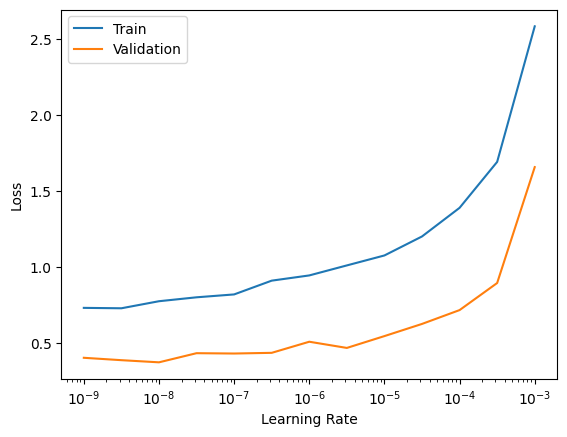

In [32]:
# Plot learning rate vs loss
lrs = 1e-3 * np.power(0.1, np.linspace(0, 6, len(history.history['loss'])))

plt.semilogx(lrs, history.history['loss'])
plt.semilogx(lrs, history.history['val_loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

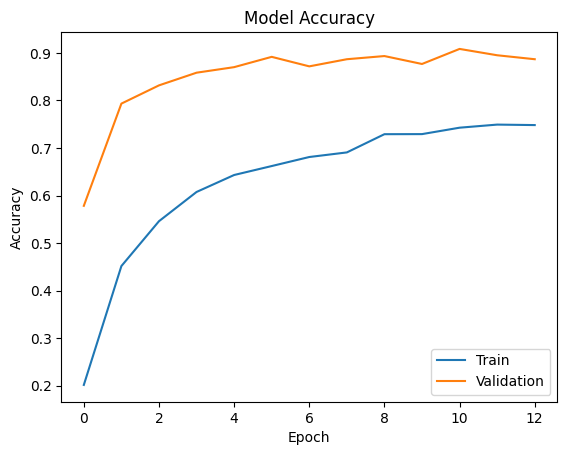

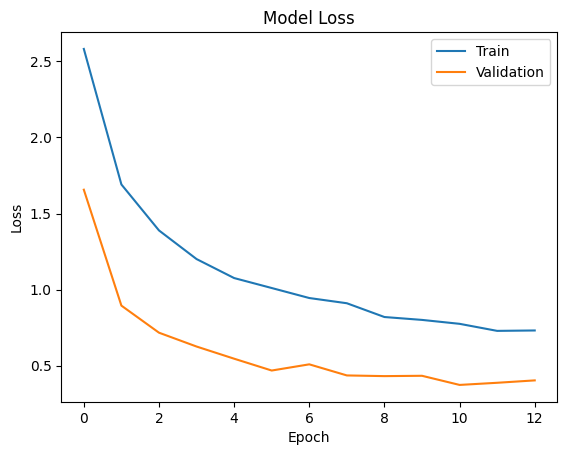

In [33]:
#Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# 4. Visualize the result<a class="anchor" id="4"></a>

In [34]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

19/19 [==============================] - 12s 486ms/step


In [35]:
labels.items()

dict_items([(0, 'AP115'), (1, 'AP116'), (2, 'AP117'), (3, 'AP118'), (4, 'AP119'), (5, 'AP120'), (6, 'BP077'), (7, 'CP062'), (8, 'CP083'), (9, 'DP030'), (10, 'DP031'), (11, 'EP016'), (12, 'FP036'), (13, 'FP062'), (14, 'FP089'), (15, 'FP090'), (16, 'FP091'), (17, 'FP092'), (18, 'FP093'), (19, 'GP083')])

In [36]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 91.50%


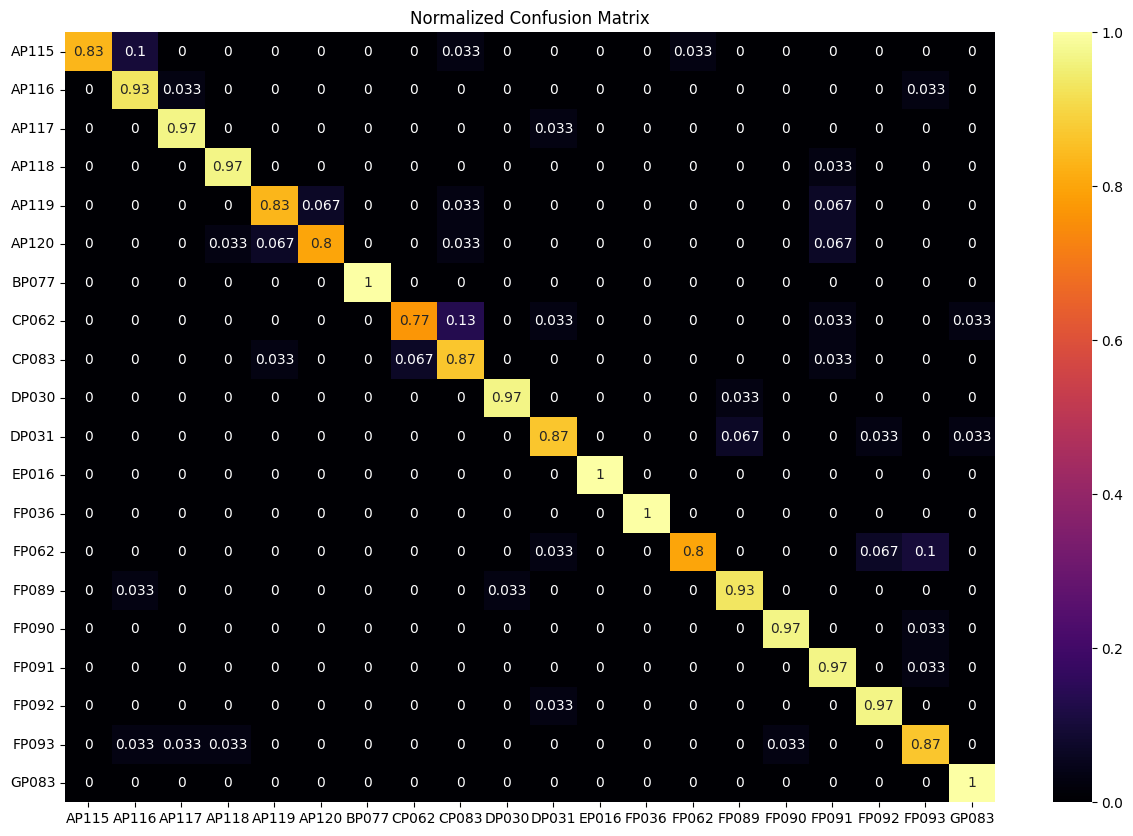

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cf_matrix = confusion_matrix(y_test, pred, normalize='true')

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix,
            cmap="inferno",
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )

# Set the title of the plot
plt.title('Normalized Confusion Matrix')

# Display the plot
plt.show()

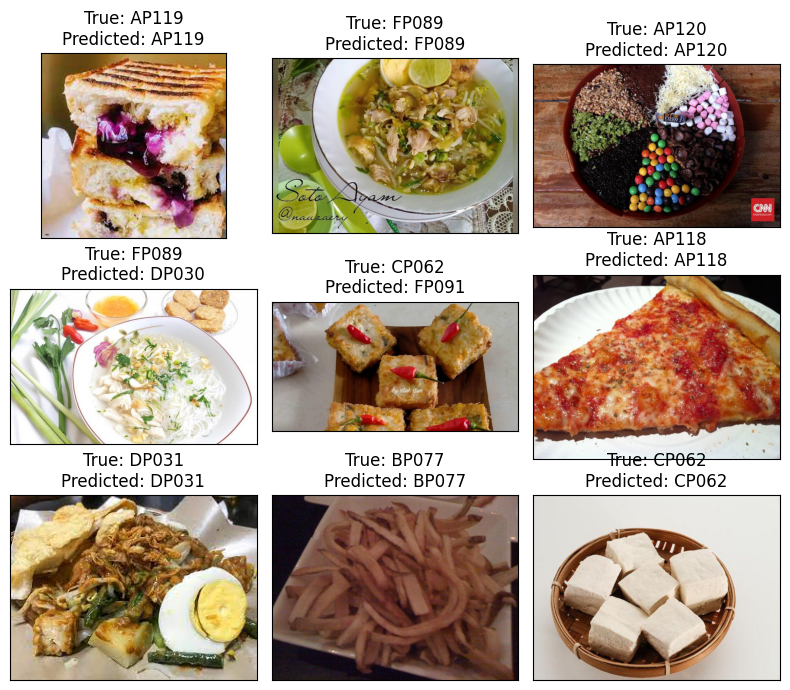

In [44]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.filepath.iloc[i]))
    ax.set_title(f"True: {test_df.label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

## 5. Class activation heatmap for image classification<a class="anchor" id="5"></a>
### Grad-CAM class activation visualization
*Code adapted from keras.io*

In [59]:
import matplotlib.cm as cm

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    # Display(Image(cam_path))
    
    return cam_path
    
preprocess_input = tf.keras.applications.densenet.preprocess_input
decode_predictions = tf.keras.applications.densenet.decode_predictions

last_conv_layer_name = "conv5_block32_concat"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].ativation = None

<ipython-input-59-00ec42036426>:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


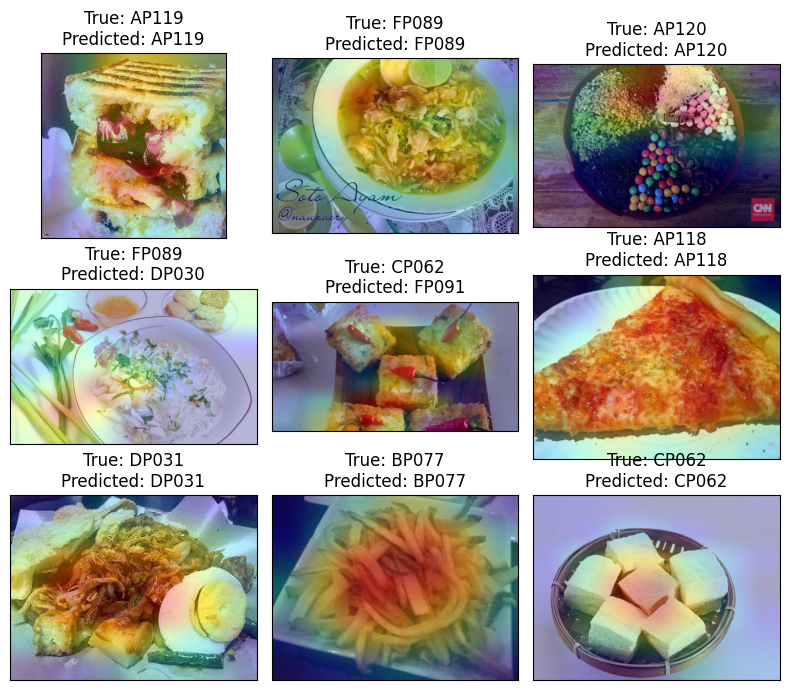

In [60]:
# Display the part of the pictures used by the neural network to classify the pictures
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.filepath.iloc[i]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [49]:
def output(location):
    from tensorflow.keras.preprocessing.image import load_img,img_to_array
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

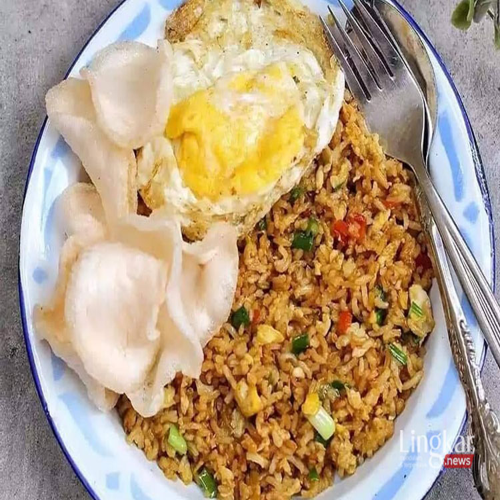

In [50]:
from IPython.display import display
from PIL import Image
location = '/content/nasigoreng.jpg'
image = Image.open(location)
new_image = image.resize((500, 500))
display(new_image)

In [51]:
img = output(location)
img

1/1 [==============================] - 5s 5s/step


'AP115'

In [61]:
model.save('model_dense.h5')